In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.inspection import DecisionBoundaryDisplay

In [23]:
# Load data
iris = load_iris()

features=iris.feature_names
print(features)

X = iris.data[:, :2]  # we only take the first two features.

# Extracting Target / Class Labels
y = iris.target

print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [24]:
# Train Test split 
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 42)

In [52]:
#train decision tree

clf = DecisionTreeClassifier(criterion='entropy', max_depth=4) #clf to denote classifier
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [40]:
#evaluation on training data

y_pred = clf.predict(X_train)

print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[31  0  0]
 [ 0 31  6]
 [ 0  7 30]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.82      0.84      0.83        37
           2       0.83      0.81      0.82        37

    accuracy                           0.88       105
   macro avg       0.88      0.88      0.88       105
weighted avg       0.88      0.88      0.88       105



In [53]:
#evaluation on test data

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19  0  0]
 [ 0  6  7]
 [ 0  2 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.75      0.46      0.57        13
           2       0.61      0.85      0.71        13

    accuracy                           0.80        45
   macro avg       0.79      0.77      0.76        45
weighted avg       0.82      0.80      0.79        45



Text(0.5, 1.0, '3-Class classification with Decision Tree- Training Data')

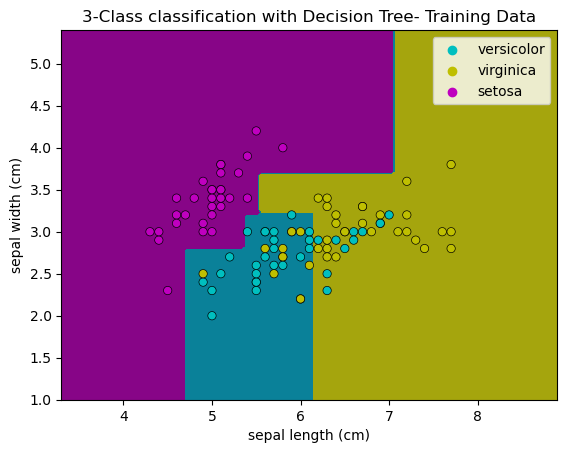

In [54]:
# Plot the decision boundary

# Create color maps
cmap_boundary = ListedColormap(["#870587", "#0a8199","#a5a50d"])
cmap_scatter = ["c", "y","m"] 

DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=cmap_boundary, #add colortheme
    response_method="predict",
    xlabel=features[0],
    ylabel=features[1],
)

# Plot training data

sns.scatterplot(
        x=X_train[:, 0],
        y=X_train[:, 1],
        hue=iris.target_names[y_train],
        palette=cmap_scatter,
        alpha=1.0,
        edgecolor="black",
    )

plt.title("3-Class classification with Decision Tree- Training Data")

Text(0.5, 1.0, '3-Class classification with Decision Tree- Test Data')

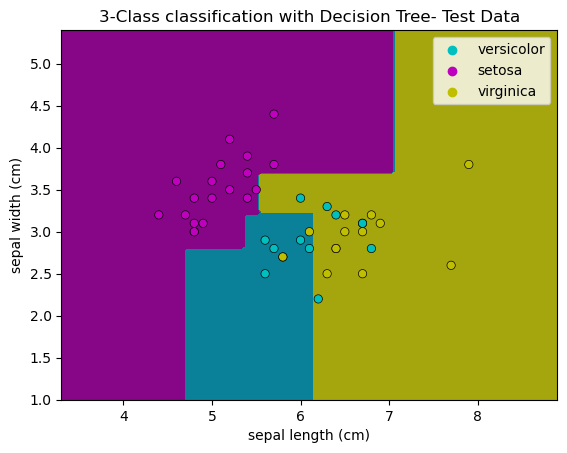

In [55]:
# Plot the decision boundary

# Create color maps
cmap_boundary = ListedColormap(["#870587", "#0a8199","#a5a50d"])
cmap_scatter = ["c", "y","m"] 


DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=cmap_boundary, #add colortheme
    response_method="predict",
    xlabel=features[0],
    ylabel=features[1],
)

# Plot test data

cmap_blend = ["c", "m", "y"] #define color palette for scatterplot

sns.scatterplot(
        x=X_test[:, 0],
        y=X_test[:, 1],
        hue=iris.target_names[y_test],
        palette=cmap_blend,
        alpha=1.0,
        edgecolor="black",
    )

plt.title("3-Class classification with Decision Tree- Test Data")